# <center> SPTF Scheduling Project </center>
## <center> Giacomo Sguotti - 10667547 </center>
---
### <center> Used Parameters </center>

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [7, 4]
plt.rcParams['figure.dpi'] = 200

In [165]:
# change the file name here to change SPTF statistics
mg1 = pd.read_csv('Net1SPTF.csv', skiprows = lambda x: x!=0 and x < 14)

In [166]:
# change the file name here to change FCFS statistics
fcfs = pd.read_csv('Net1FCFS.csv', skiprows = lambda x: x!=0 and x < 14)

$ 1/\lambda $ [s] 

In [167]:
avgInterArrivalTime = float(mg1.attrvalue[1].replace("s",""))
avgInterArrivalTime

0.8

$ L $

In [168]:
L = float(mg1.attrvalue[2].replace("s",""))
L

0.5

$ nbIntervals $

In [169]:
nbIntervals = int(mg1.attrvalue[3])
nbIntervals

1000

---
### <center> Conditional Queuing Time </center>

In [170]:
# Parsing for queuing time
allQueuingStrings = []
for i in range(0,nbIntervals,1):
    allQueuingStrings.append('queuingTimeInterval:'+str(i)+':mean')
onlyQueuingTimeMg1 = mg1[mg1.name.isin(allQueuingStrings)]
onlyQueuingTimeMg1 = onlyQueuingTimeMg1[~onlyQueuingTimeMg1.attrname.isin(["title"])]
onlyQueuingTimeMg1.reset_index(inplace=True, drop=True)

In [171]:
omnetQueuingTime = []
for i in range(0,nbIntervals,1):
    omnetQueuingTime.insert(0, float(onlyQueuingTimeMg1.value[i]))

In [172]:
# Parsing FCFS
# Parsing for queuing time
allQueuingStrings = []
for i in range(0,nbIntervals,1):
    allQueuingStrings.append('queuingTimeInterval:'+str(i)+':mean')
onlyQueuingTimeFcfs = fcfs[fcfs.name.isin(allQueuingStrings)]
onlyQueuingTimeFcfs = onlyQueuingTimeFcfs[~onlyQueuingTimeFcfs.attrname.isin(["title"])]
onlyQueuingTimeFcfs.reset_index(inplace=True, drop=True)
fcfsQueuingTime = []
for i in range(0,nbIntervals,1):
    fcfsQueuingTime.insert(0, float(onlyQueuingTimeFcfs.value[i]))

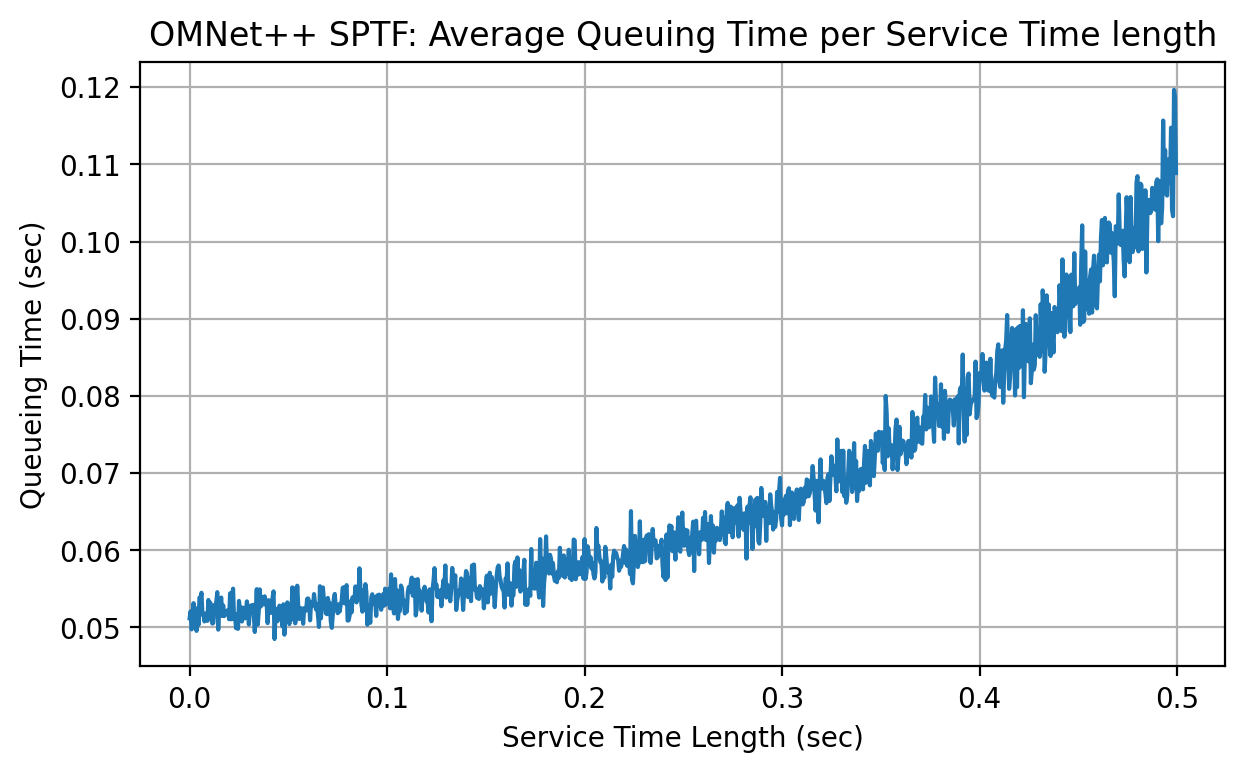

In [173]:
fig, ax = plt.subplots()
ax.set_title("OMNet++ SPTF: Average Queuing Time per Service Time length")
ax.set_ylabel("Queueing Time (sec)")
#ax.set_ylim(0, 0.001)
#ax.set_xlim(0, L)
ax.set_xlabel("Service Time Length (sec)")
x = np.arange(0, L, L/nbIntervals)
ax.grid()
ax.plot(x, omnetQueuingTime)

In [174]:
variance = L**2 / 12
mean = L/2
eSSquared = variance + mean**2
#eSSquared = L**3/(3*L) # unfirom E[S^2] same result as previous

In [175]:
theoreticalQueuingTime = []
x = np.arange(0, L, L/nbIntervals)
for i in range(0,nbIntervals,1):
    theoreticalQueuingTime.append(1/avgInterArrivalTime*eSSquared/(2*(1-1/avgInterArrivalTime*x[i]/2)**2))

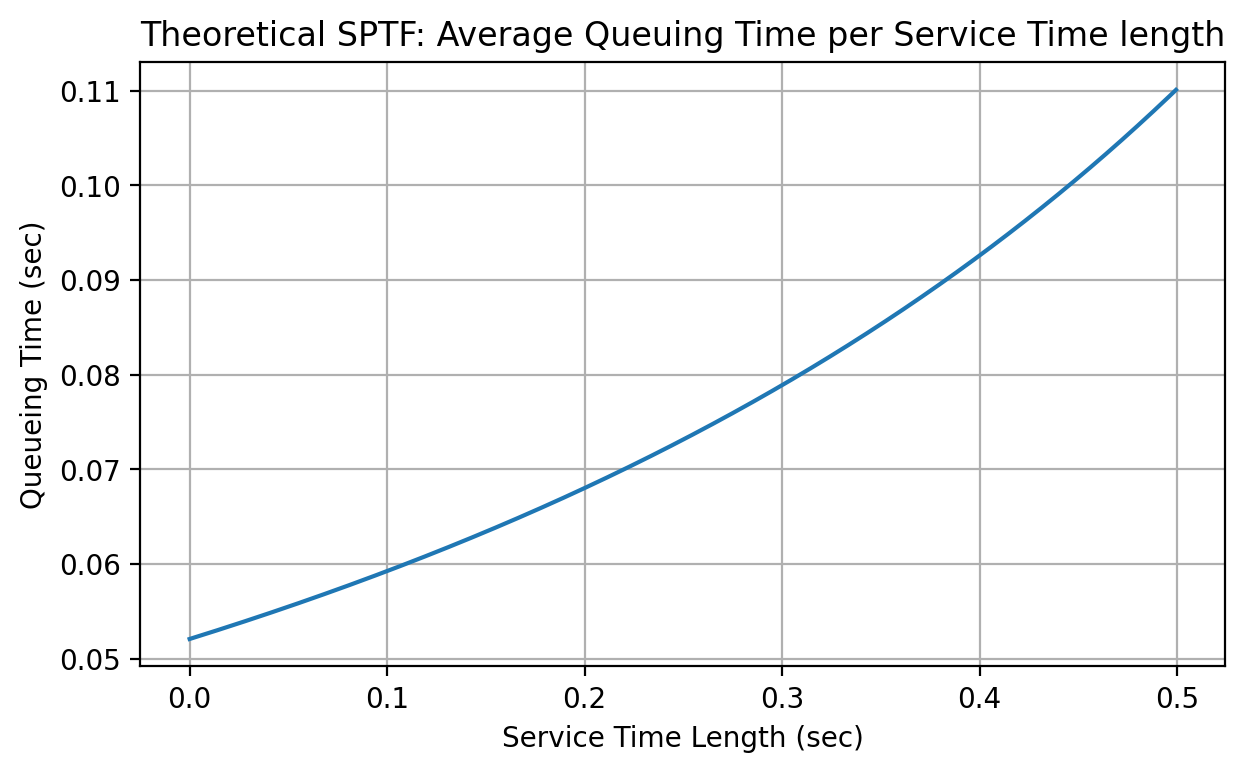

In [176]:
fig, ax = plt.subplots()
ax.set_title("Theoretical SPTF: Average Queuing Time per Service Time length")
ax.set_ylabel("Queueing Time (sec)")
#ax.set_ylim(0, 0.4)
#ax.set_xlim(0, L)
ax.set_xlabel("Service Time Length (sec)")
x = np.arange(0, L, L/nbIntervals)
ax.grid()
ax.plot(x, theoreticalQueuingTime)

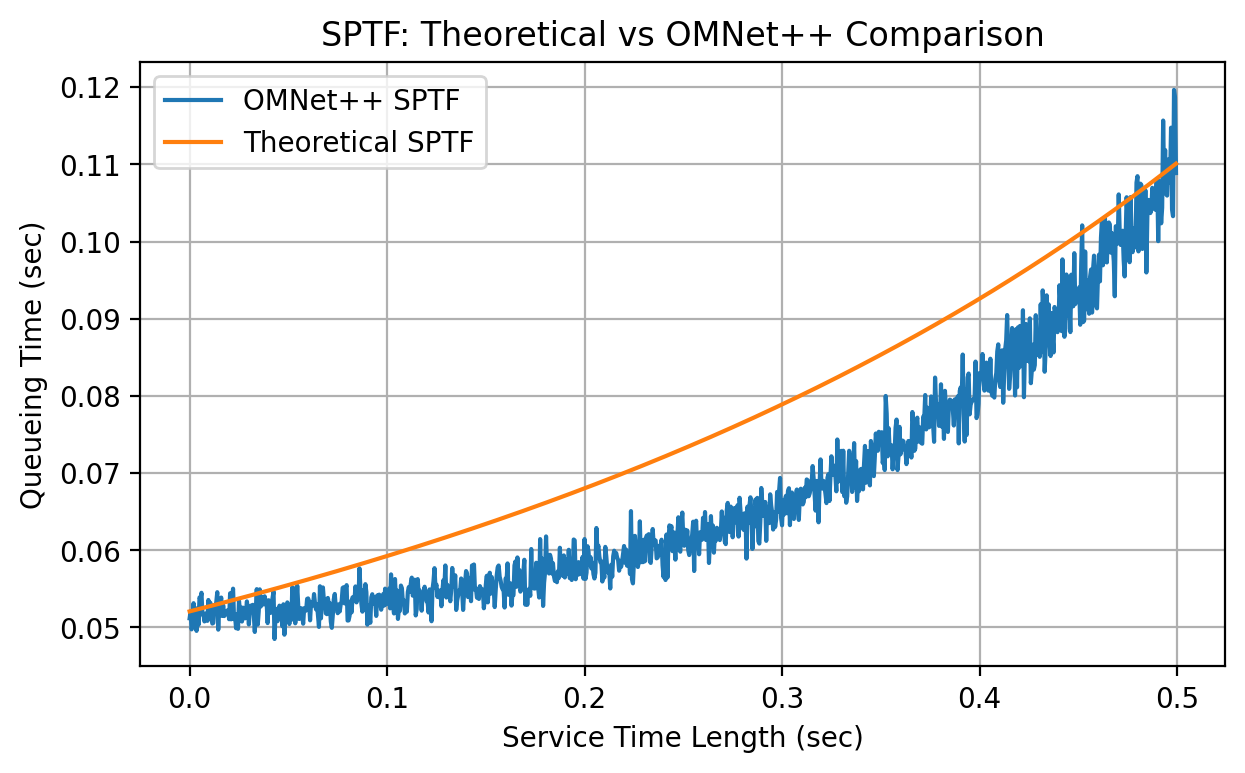

In [177]:
fig, ax = plt.subplots()
ax.set_title("SPTF: Theoretical vs OMNet++ Comparison")
ax.set_ylabel("Queueing Time (sec)")
ax.set_xlabel("Service Time Length (sec)")
x = np.arange(0, L, L/nbIntervals)
# OMNet++ SPTF
ax.plot(x, omnetQueuingTime, label = "OMNet++ SPTF")
# Theoretical
ax.plot(x, theoreticalQueuingTime, label = "Theoretical SPTF")
ax.grid()
ax.legend()
fig.savefig('SPTF_QueuingTime.png')

#### $ MSE_{SPTF} $

In [178]:
mse = (np.square(np.subtract(theoreticalQueuingTime, omnetQueuingTime))).mean()
mse

9.215010407196824e-05

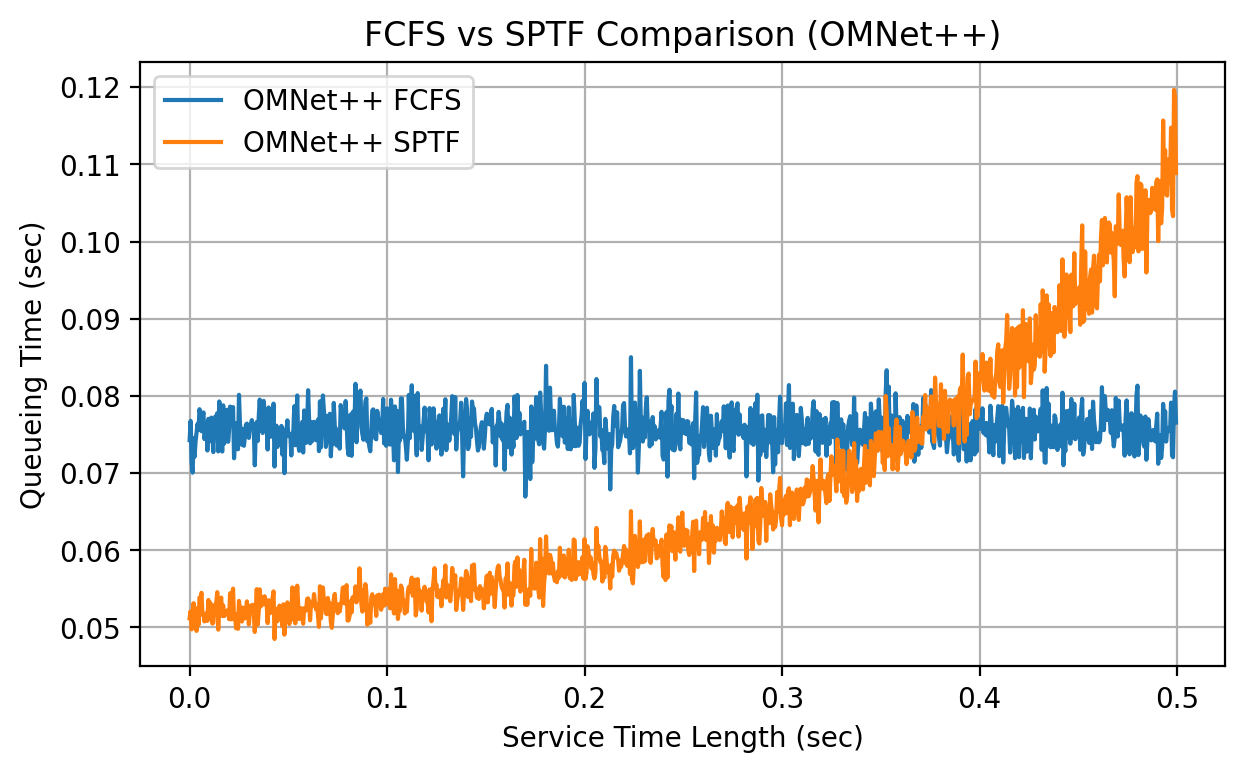

In [179]:
fig, ax = plt.subplots()
ax.set_title("FCFS vs SPTF Comparison (OMNet++)")
ax.set_ylabel("Queueing Time (sec)")
ax.set_xlabel("Service Time Length (sec)")
x = np.arange(0, L, L/nbIntervals)
# OMNet++ FCFS
ax.plot(x, fcfsQueuingTime, label = "OMNet++ FCFS")
# OMNet++ SPTF
ax.plot(x, omnetQueuingTime, label = "OMNet++ SPTF")
ax.grid()
ax.legend()
fig.savefig('FCFSvsSPTF_QueuingTime.png')

---
### <center> General Queuing Time (from OMNet++) </center>
#### <center> SPTF </center>
$ W_{q}^{SPTF} $

In [180]:
omnetGeneralQueuingTime = mg1[mg1["name"] == "generalQueuingTime:mean"]
omnetGeneralQueuingTime.reset_index(inplace=True, drop=True)
omnetGeneralQueuingTime = float(omnetGeneralQueuingTime["value"][0])
omnetGeneralQueuingTime

0.067272024453848

#### <center> FCFS </center>
$ W_{q}^{FCFS} $

In [181]:
fcfsGeneralQueuingTime = fcfs[fcfs["name"] == "generalQueuingTime:mean"]
fcfsGeneralQueuingTime.reset_index(inplace=True, drop=True)
fcfsGeneralQueuingTime = float(fcfsGeneralQueuingTime["value"][0])
fcfsGeneralQueuingTime

0.075703430027185

---
### <center> Utilization factor </center>
#### <center> Theoretical </center>
$ \rho_{SPTF} = \lambda E[S] $

In [182]:
theoreticalRho = 1/avgInterArrivalTime*mean
theoreticalRho

0.3125

#### <center> OMNet++ </center>
$ \rho_{SPTF} $

In [183]:
omnetppRho = mg1[mg1["name"] == "utilizationFactor:timeavg"]
omnetppRho.reset_index(inplace=True, drop=True)
omnetppRho = float(omnetppRho["value"][0])
omnetppRho

0.31258713738215

$ \rho_{FCFS} $

In [184]:
fcfsRho = fcfs[fcfs["name"] == "utilizationFactor:timeavg"]
fcfsRho.reset_index(inplace=True, drop=True)
fcfsRho = float(fcfsRho["value"][0])
fcfsRho

0.31258713738215

---
###  <center> Average response Time </center>
#### <center> OMNet++ </center>
$ W_{SPTF} $

In [185]:
omnetResponseTime = mg1[mg1["name"] == "responseTime:mean"]
omnetResponseTime.reset_index(inplace=True, drop=True)
omnetResponseTime = float(omnetResponseTime["value"][0])
omnetResponseTime

0.31732520810456

$ W_{FCFS} $

In [186]:
fcfsResponseTime = fcfs[fcfs["name"] == "responseTime:mean"]
fcfsResponseTime.reset_index(inplace=True, drop=True)
fcfsResponseTime = float(fcfsResponseTime["value"][0])
fcfsResponseTime

0.32575661555146

#### <center> Theoretical </center>
$ W_{SPTF} = W^q + E[S] = \frac{\lambda E[S^2]}{2} + \frac{L}{2}$  

In [187]:
theoreticalResponseTime = 1/avgInterArrivalTime*eSSquared/2+L/2
theoreticalResponseTime

0.3020833333333333

---
###  <center> Results </center>
Theoretical and OMNet++ Waiting in queue curves slightly differ and this could be due to the limited amount of samples recorded during the simulation. But as expected, the $ W_q $, and $W$ consequently, is minimized using the SPTF Scheduling. In particular, using the above parameters, with respect to the Queuing System using the FCFS Scheduling the improvement is of 11.7942%.

The statistics used in this comparison can be found in the delivered material as '*Net1FCFS.csv*' and '*Net1SPTF.csv*'. Using the IPython Notebook file called '*SPTF Scheduling Comparison.ipynb*' it is possible to analyze statistics with other parameters by changing the .csv files.